#Boosting Techniques Assignment

#Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.


- Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like decision stumps) to create a strong learner with high accuracy.

- How It Works:

1. Start with a weak model:
   - Train a simple model (like a shallow decision tree) on the training data.

2. Focus on errors:
   - After training, Boosting gives more weight to the data points that were misclassified — meaning the next model focuses more on these hard-to-learn examples.

3. Sequential training:
   - Each new weak learner is trained one after another, correcting the mistakes of the previous models.

4. Combine models:
   - The final model is a weighted sum (or vote) of all weak learners — giving more influence to better-performing ones.

- How Boosting Improves Weak Learners:

    - Converts many low-accuracy models into one high-accuracy model.

    - Focuses on difficult samples, improving learning efficiency.

    - Reduces bias and variance, leading to better generalization.

- Common Boosting Algorithms:

     - AdaBoost (Adaptive Boosting)

    - Gradient Boosting

    - XGBoost (Extreme Gradient Boosting)

    - LightGBM

    - CatBoost


#Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

1. Main Idea:

    - AdaBoost: Focuses on misclassified samples by adjusting their weights.

    - Gradient Boosting: Focuses on residual errors by minimizing a loss function using gradient descent.

2. Training Approach:

   - AdaBoost: Each new model gives more importance to data points that were wrongly predicted earlier.

   - Gradient Boosting: Each new model is trained to predict the residuals (errors) of the previous model.

3. Error Handling:

   - AdaBoost: Increases weights of incorrect predictions so that the next model focuses on them.

   - Gradient Boosting: Uses gradients of the loss function to correct previous mistakes.

4. Loss Function:

   - AdaBoost: Uses a fixed exponential loss function.

   - Gradient Boosting: Can use any differentiable loss function (like MSE, log loss, etc.).

5. Model Combination:

   - AdaBoost: Final model is a weighted sum of weak learners based on their accuracy.

   - Gradient Boosting: Final model is a weighted sum based on gradient updates to minimize total loss.


#Question 3: How does regularization help in XGBoost?

1. Controls model complexity:
   - Regularization prevents the trees in XGBoost from becoming too deep or too complex, reducing the risk of overfitting.

2. Adds penalty to the objective function:
   - XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, which penalize large or unnecessary weights.

3. Encourages simpler models:
    - By shrinking less important feature weights toward zero, it ensures the model stays simpler and more generalizable.

4. Improves generalization:
   - Regularization helps the model perform better on unseen data rather than just memorizing the training set.

5. Balances bias and variance:
   - It helps achieve the right trade-off — reducing variance (overfitting) while maintaining low bias.

#Question 4: Why is CatBoost considered efficient for handling categorical data?


1. No need for manual encoding:
   - CatBoost can directly handle categorical features without using One-Hot or Label Encoding manually.

2. Uses Target-Based Encoding (with permutation):
   - It converts categorical values into numbers using a special algorithm called Ordered Target Statistics, which uses the mean target value while preventing data leakage.

3. Reduces overfitting:
   - The ordered encoding ensures the model doesn’t learn from future data, which helps maintain robustness and prevents overfitting.

4. Efficient and fast:
   - Built-in handling of categorical data makes training faster and memory-efficient, as it avoids large feature expansion caused by One-Hot Encoding.

5. Better accuracy:
   - By naturally capturing relationships within categorical features, CatBoost often gives higher accuracy on datasets with many categorical variables.


#Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

1. Credit Scoring and Fraud Detection:
   - Boosting (like XGBoost or LightGBM) is used to detect fraudulent transactions or loan defaults, where identifying subtle patterns in data is crucial.

2. Customer Churn Prediction:
    - Helps companies predict which customers are likely to leave by focusing on hard-to-predict cases through sequential learning.

3. Medical Diagnosis:
   - Boosting improves accuracy in disease prediction and patient risk assessment by combining multiple weak models for better precision.

4. Marketing and Sales Forecasting:
   - Used to predict customer responses to campaigns or future sales trends, where performance and interpretability are important.

5. Ranking and Recommendation Systems:
   - Applied in search engines (like Google) and e-commerce platforms (like Amazon) to rank products or content effectively.

6. Text Classification and Sentiment Analysis:
   - Boosting methods perform well in NLP tasks like spam detection, review sentiment analysis, and document categorization.


---




#Datasets:
#● Use sklearn.datasets.load_breast_cancer() for classification tasks.
#● Use sklearn.datasets.fetch_california_housing() for regression tasks.


---


#Question 6: Write a Python program to:
#● Train an AdaBoost Classifier on the Breast Cancer dataset
#● Print the model accuracy
   

   

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


#Question 7: Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score



In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.8004451261281281


#Question 8: Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy



In [3]:
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Model Accuracy:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:18:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1}
Model Accuracy: 0.956140350877193


#Question 9: Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn




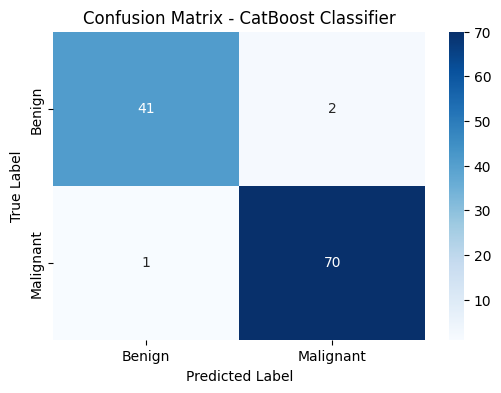

In [10]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix - CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




#Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features. Describe your step-by-step data science pipeline using boosting techniques:
#● Data preprocessing & handling missing/categorical values
#● Choice between AdaBoost, XGBoost, or CatBoost
#● Hyperparameter tuning strategy
#● Evaluation metrics you'd choose and why
#● How the business would benefit from your model


1. Data Preprocessing

  - Missing values:

     - Numeric → fill with median or mean.

     - Categorical → replace with “missing” or most frequent value.

  - Categorical encoding:

      - Use CatBoost (handles automatically) or One-Hot/Target Encoding for XGBoost/AdaBoost.

2. Choice of Boosting Algorithm

    - CatBoost: Best for mixed data (handles categorical + missing values).

    - XGBoost: Fast, flexible, great for large numeric datasets.
3. Hyperparameter Tuning

    - Use Stratified K-Fold CV.

    - Start with RandomizedSearchCV, then fine-tune using GridSearchCV.

4. Evaluation Metrics

   - Avoid accuracy (misleading for imbalanced data).

 - Use:

     - ROC-AUC and Precision-Recall AUC

     - F1-score, Recall, Precision

     - Confusion matrix to visualize errors

5. Business Benefits

     - Lower credit losses by accurately identifying high-risk customers.

    - Better credit decisions and personalized interest rates.
